## Descriptive Analytics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Travel.csv")
df.sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1218,201218,0,41.0,Self Enquiry,3,12.0,Small Business,Male,2,3.0,Standard,3.0,Unmarried,2.0,0,5,1,0.0,Senior Manager,24241.0
3634,203634,0,33.0,Self Enquiry,1,9.0,Small Business,Male,3,4.0,Deluxe,4.0,Married,2.0,0,4,0,2.0,Manager,24148.0
3132,203132,1,20.0,Self Enquiry,3,28.0,Salaried,Male,3,5.0,Basic,4.0,Single,3.0,1,2,0,2.0,Executive,20799.0
825,200825,0,29.0,Self Enquiry,1,14.0,Small Business,Male,3,4.0,Deluxe,3.0,Divorced,2.0,1,3,0,0.0,Manager,20056.0
3142,203142,0,36.0,Self Enquiry,3,25.0,Small Business,Female,3,4.0,Deluxe,3.0,Divorced,3.0,0,4,1,1.0,Manager,23279.0
4753,204753,0,43.0,Self Enquiry,3,11.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,2.0,0,5,1,1.0,Manager,23833.0
3129,203129,0,27.0,Company Invited,3,7.0,Small Business,Male,3,5.0,Deluxe,5.0,Unmarried,3.0,0,3,1,2.0,Manager,22972.0
3475,203475,1,47.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Standard,3.0,Married,6.0,0,3,0,2.0,Senior Manager,28774.0
259,200259,1,NaN,Company Invited,1,35.0,Small Business,Male,3,4.0,Basic,4.0,Single,1.0,0,3,1,2.0,Executive,18479.0
84,200084,0,34.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,5,0,0.0,Manager,NaN


In [ ]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerid                4888 non-null   int64  
 1   prodtaken                 4888 non-null   int64  
 2   age                       4662 non-null   float64
 3   typeofcontact             4863 non-null   object 
 4   citytier                  4888 non-null   int64  
 5   durationofpitch           4637 non-null   float64
 6   occupation                4888 non-null   object 
 7   gender                    4888 non-null   object 
 8   numberofpersonvisiting    4888 non-null   int64  
 9   numberoffollowups         4843 non-null   float64
 10  productpitched            4888 non-null   object 
 11  preferredpropertystar     4862 non-null   float64
 12  maritalstatus             4888 non-null   object 
 13  numberoftrips             4748 non-null   float64
 14  passport

In [ ]:
df['prodtaken'] = df['prodtaken'].astype('boolean')
df['passport'] = df['passport'].astype('boolean')
df['owncar'] = df['owncar'].astype('boolean')
df['citytier'] = df['citytier'].astype('object')
df['numberoffollowups'] = df['numberoffollowups'].astype('object')
df['pitchsatisfactionscore'] = df['pitchsatisfactionscore'].astype('object')
df['numberofpersonvisiting'] = df['numberofpersonvisiting'].astype('object')
df['numberofchildrenvisiting'] = df['numberofchildrenvisiting'].astype('object')
df['preferredpropertystar'] = df['preferredpropertystar'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerid                4888 non-null   int64  
 1   prodtaken                 4888 non-null   boolean
 2   age                       4662 non-null   float64
 3   typeofcontact             4863 non-null   object 
 4   citytier                  4888 non-null   object 
 5   durationofpitch           4637 non-null   float64
 6   occupation                4888 non-null   object 
 7   gender                    4888 non-null   object 
 8   numberofpersonvisiting    4888 non-null   object 
 9   numberoffollowups         4843 non-null   object 
 10  productpitched            4888 non-null   object 
 11  preferredpropertystar     4862 non-null   object 
 12  maritalstatus             4888 non-null   object 
 13  numberoftrips             4748 non-null   float64
 14  passport

In [ ]:
df.isna().sum()

,0
customerid,0
prodtaken,0
age,226
typeofcontact,25
citytier,0
durationofpitch,251
occupation,0
gender,0
numberofpersonvisiting,0
numberoffollowups,45


In [ ]:
nums = ['customerid','age','durationofpitch','numberoftrips','monthlyincome']
cats = ['typeofcontact', 'occupation','gender','productpitched', 'maritalstatus', 'designation','citytier','prodtaken','passport','owncar',\
        'numberofpersonvisiting','numberoffollowups','preferredpropertystar','pitchsatisfactionscore','numberofchildrenvisiting']

In [ ]:
df[nums].describe()

,customerid,age,durationofpitch,numberoftrips,monthlyincome
count,4888.000000,4662.000000,4637.000000,4748.000000,4655.000000
mean,202443.500000,37.622265,15.490835,3.236521,23619.853491
std,1411.188388,9.316387,8.519643,1.849019,5380.698361
min,200000.000000,18.000000,5.000000,1.000000,1000.000000
25%,201221.750000,31.000000,9.000000,2.000000,20346.000000
50%,202443.500000,36.000000,13.000000,3.000000,22347.000000
75%,203665.250000,44.000000,20.000000,4.000000,25571.000000
max,204887.000000,61.000000,127.000000,22.000000,98678.000000


In [ ]:
df[cats].describe()

,typeofcontact,occupation,gender,productpitched,maritalstatus,designation,citytier,prodtaken,passport,owncar,numberofpersonvisiting,numberoffollowups,preferredpropertystar,pitchsatisfactionscore,numberofchildrenvisiting
count,4863,4888,4888,4888,4888,4888,4888,4888,4888,4888,4888,4843.0,4862.0,4888,4822.0
unique,2,4,3,5,4,5,3,2,2,2,5,6.0,3.0,5,4.0
top,Self Enquiry,Salaried,Male,Basic,Married,Executive,1,False,False,True,3,4.0,3.0,3,1.0
freq,3444,2368,2916,1842,2340,1842,3190,3968,3466,3032,2402,2068.0,2993.0,1478,2080.0


### Insight :
* Terdapat kesalahan tipe data pada kolom prodtaken, owncar, passport dimana tipe data nya integer (int) yang seharusnya menggunakan tipe data booelean atau 1 dan 0.
    kemudian preferredpropertystar, citytier, numberoffollowups, pitchsatisfactionscore, numberofpersonvisiting, numberofchildrenvisiting dimana tipe data nya adalah int dan float yang seharusnya menggunakan tipe data object

* Terdapat missing value atau nilai null pada kolom age, typeofcontact, duratinofpitch, numberoffollowups, preferredpropertystar,numberoftrips,numberofchildrenvisiting dan monthlyincome

* Terdapat value yang salah atau kurang sesuai pada kolom gender dan marital status, untuk kolom gender terdapat value Fe Male dimana seharusnya unique value hanya ada 2 yaitu Male dan Female, kemudian untuk marital status terdapat 2 kata yang berbeda tapi 1 value yaitu single dan unmarried yang menyebabkan unique value nya menjadi 4

* pada kolom numerik untuk standar deviation atau simpangan baku lebih kecil dari mean nya yang dapat disimpulkan bahwa jumlah variasi data nya tidak banyak
    kemudian untuk min dan max jarak nya jauh dari min ke max untuk kolom durationofpitch dan monthlyincome

untuk selebih nya sudah aman


## Univariate Analysis

In [ ]:
# Fungsi untuk menampilkan diagram sesuai dengan tipe data
def univariate_analysis(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(10, 6))

        if dataframe[column].dtype == 'object':
            # Kategorikal: Tampilkan Countplot
            sns.countplot(data=dataframe, x=column)
            plt.title(f'Count Plot of {column}')
            plt.xticks(rotation=45)

        else:
            # Numerik: Tampilkan Histogram dan Boxplot
            plt.subplot(1, 2, 1)
            sns.histplot(dataframe[column], kde=True)
            plt.title(f'Histogram of {column}')

            plt.subplot(1, 2, 2)
            sns.boxplot(y=dataframe[column])
            plt.title(f'Boxplot of {column}')

        plt.tight_layout()
        plt.show()

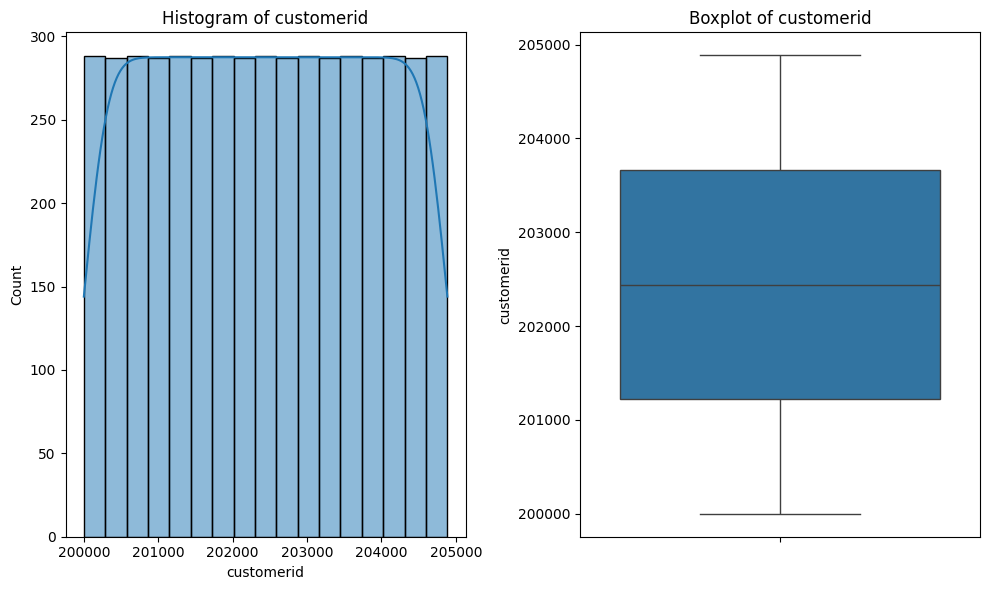

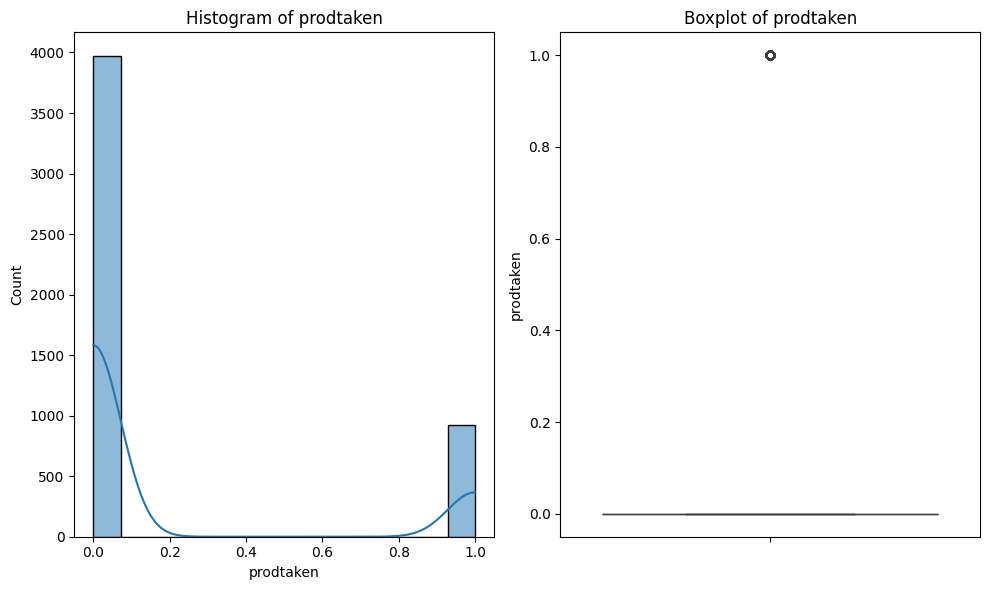

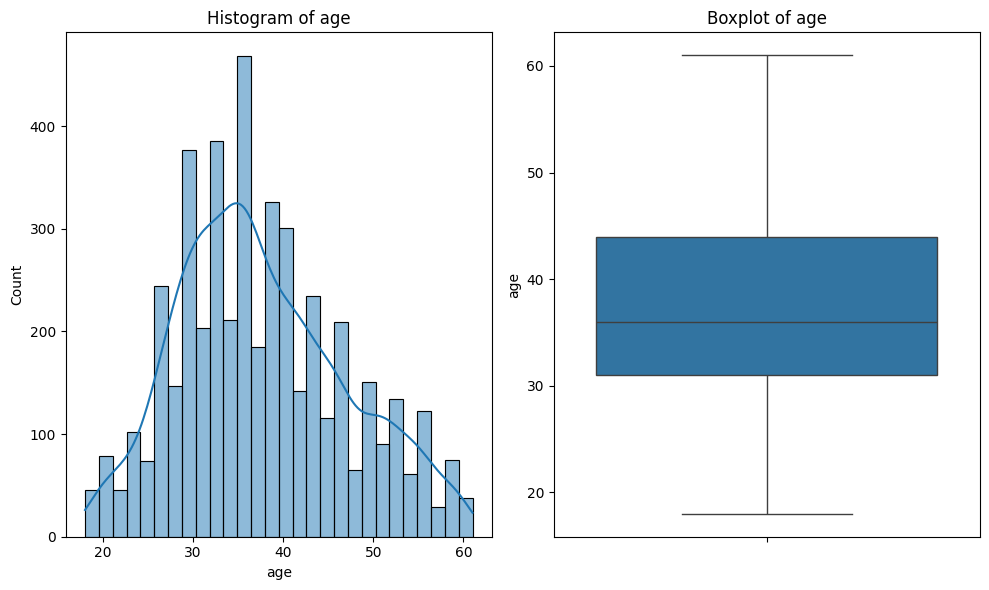

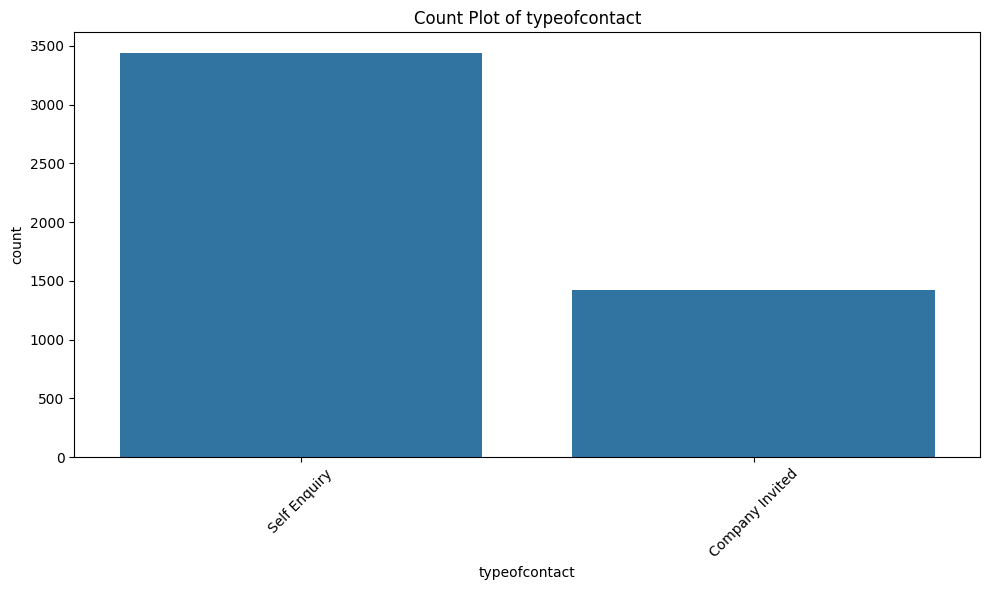

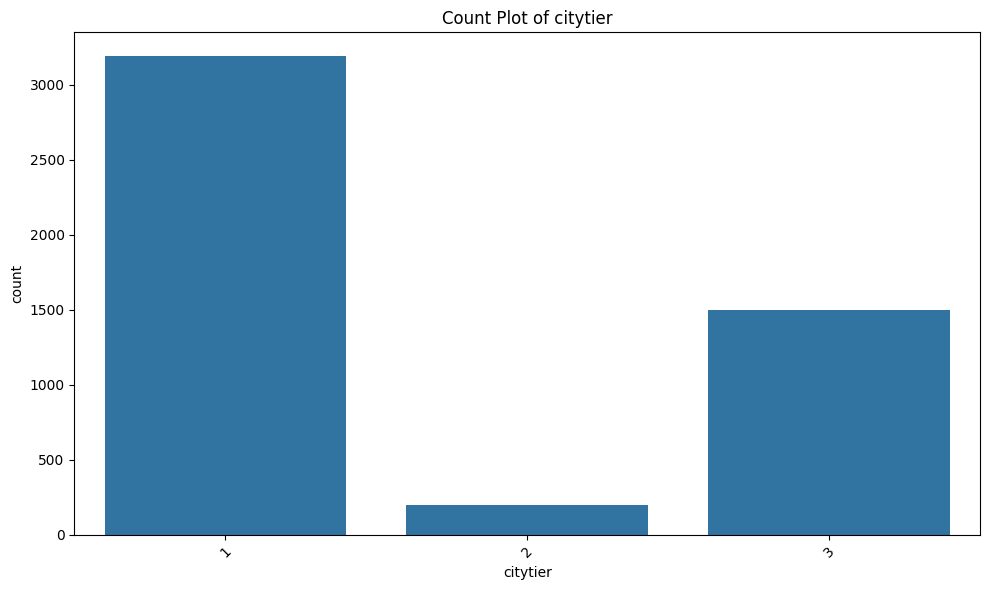

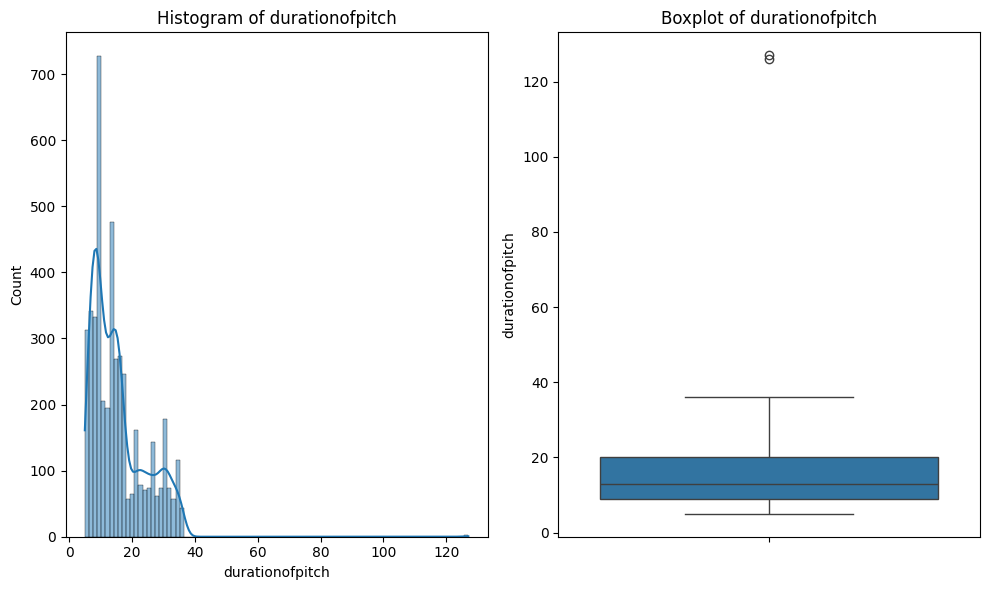

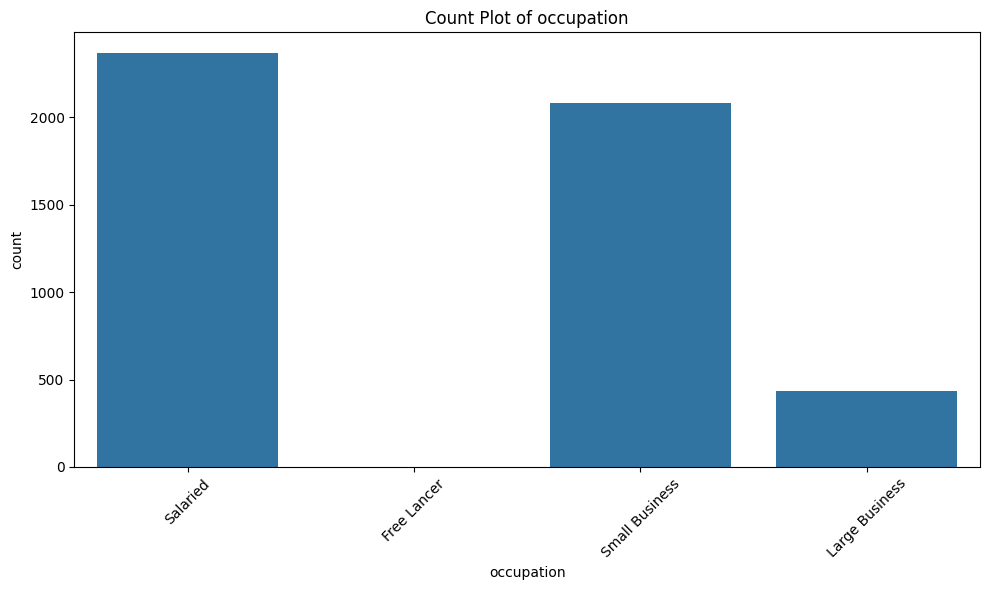

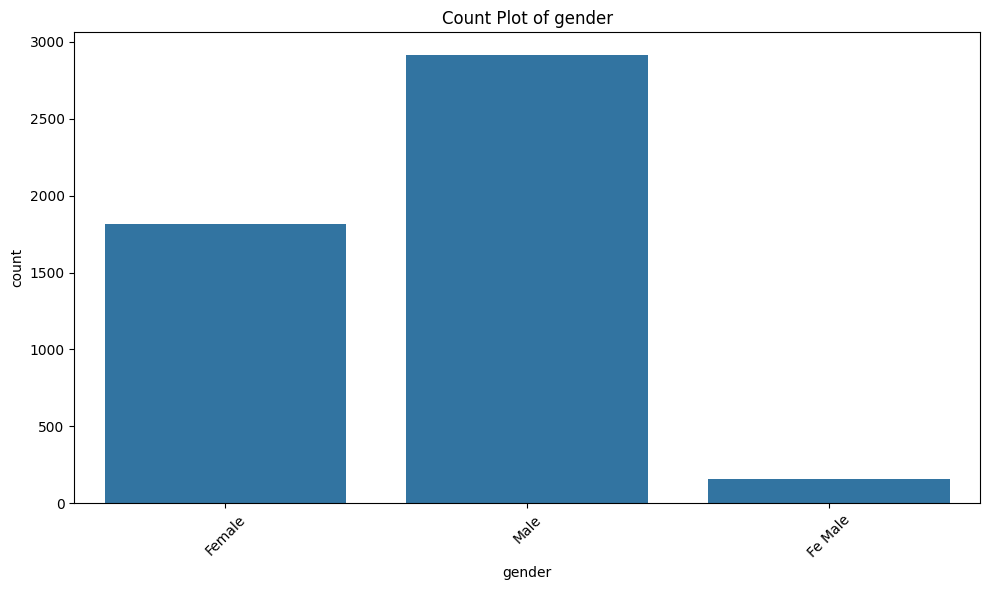

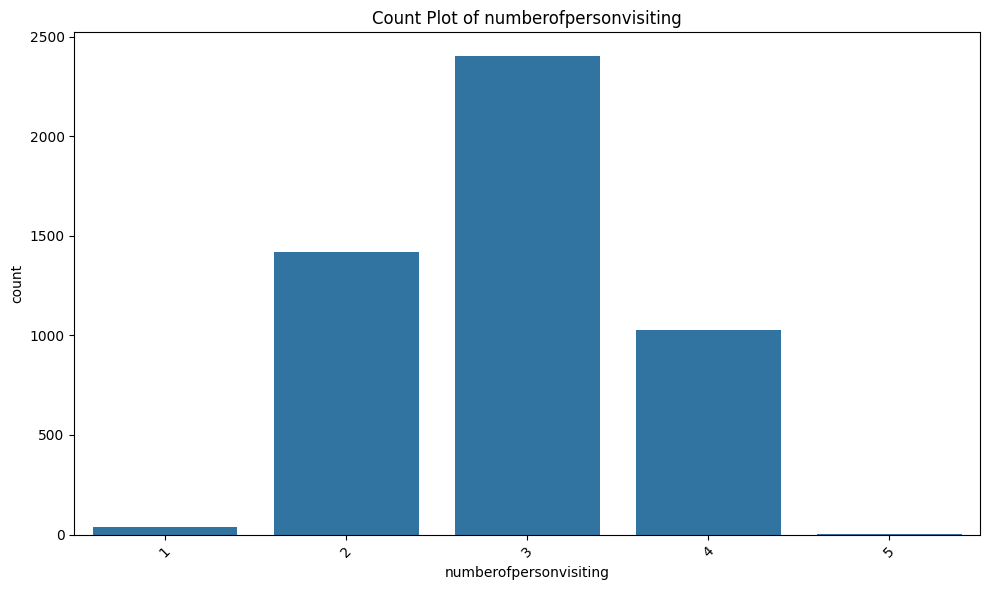

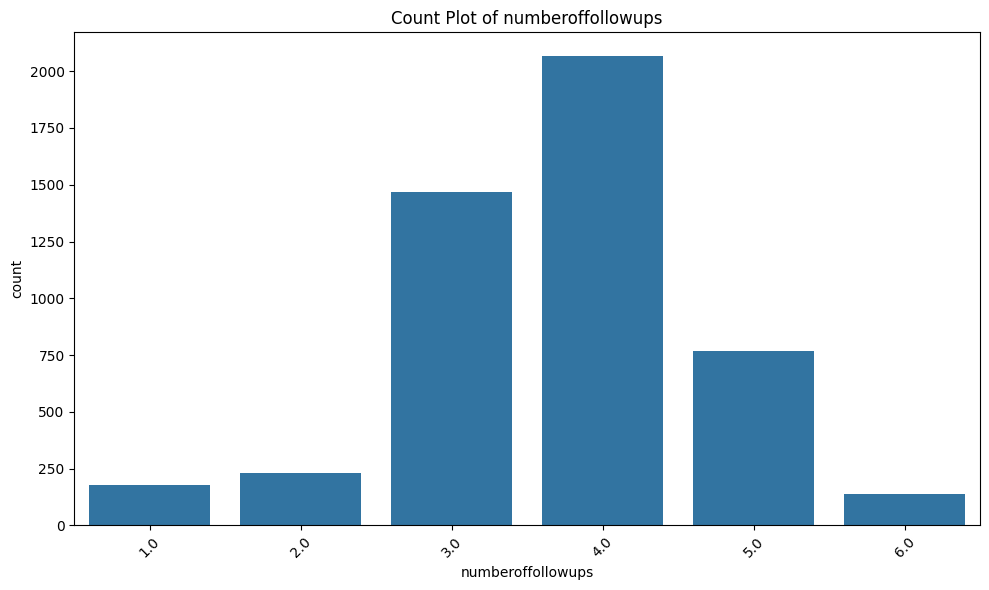

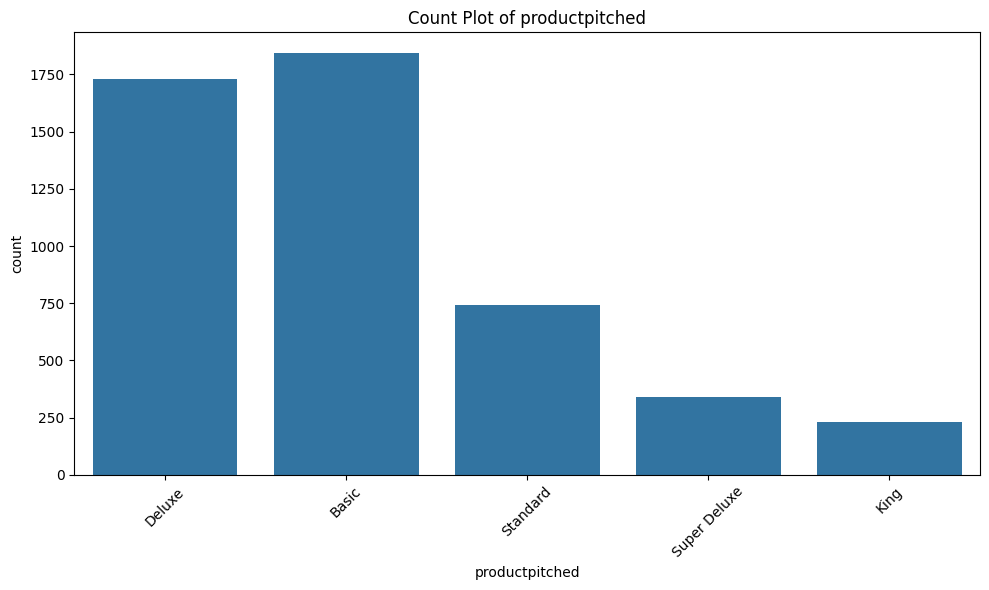

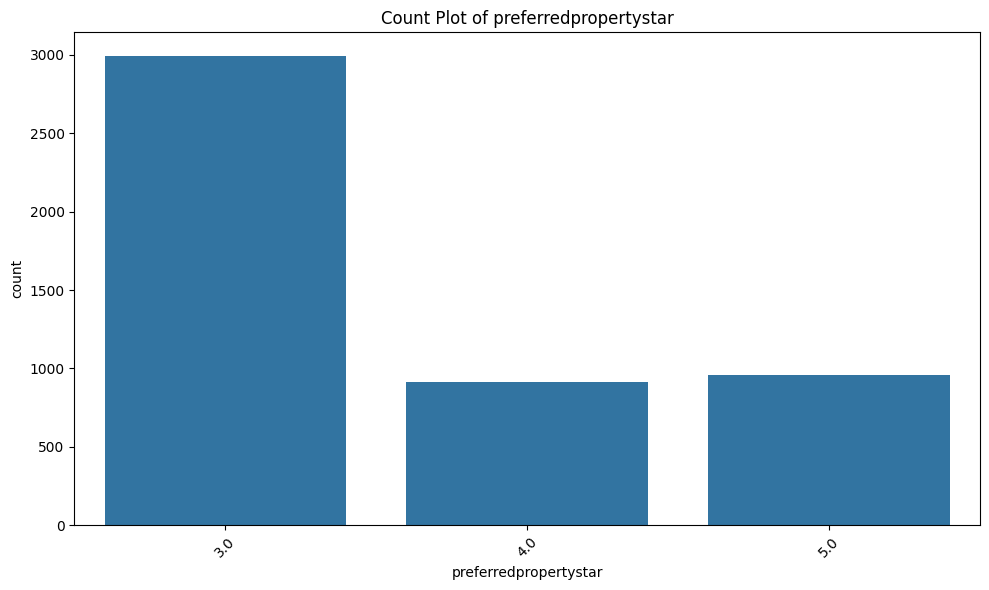

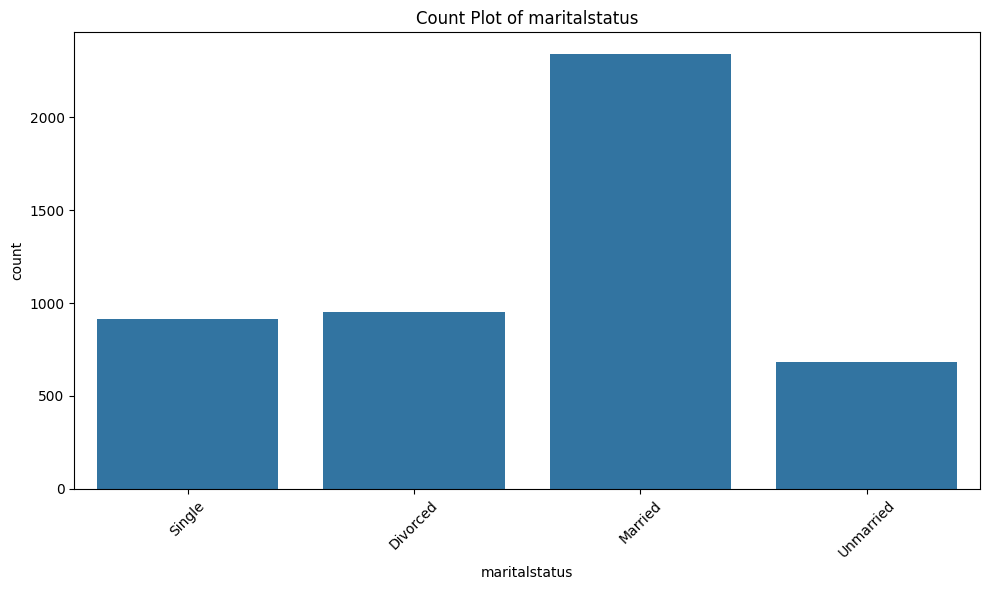

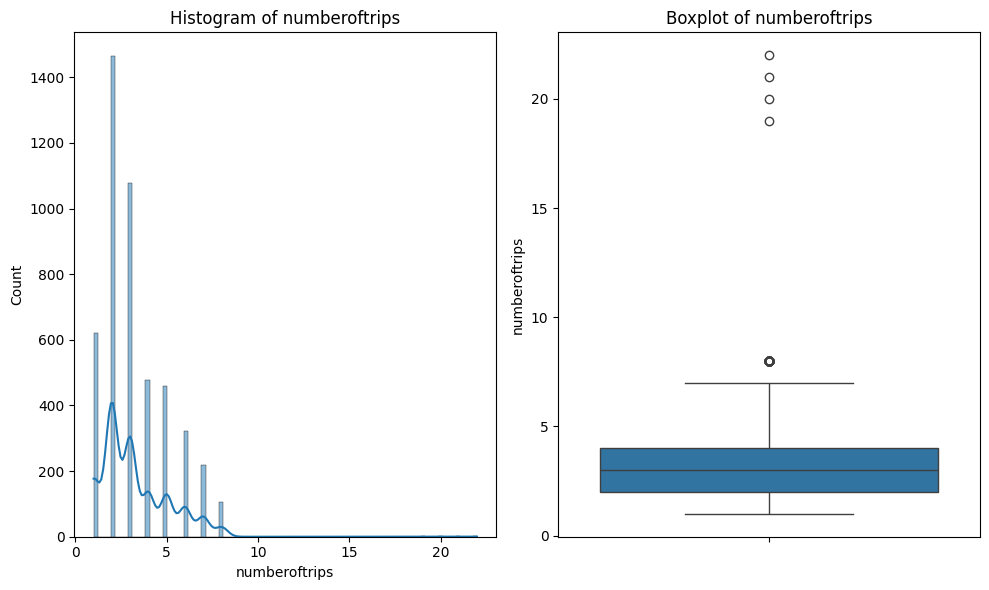

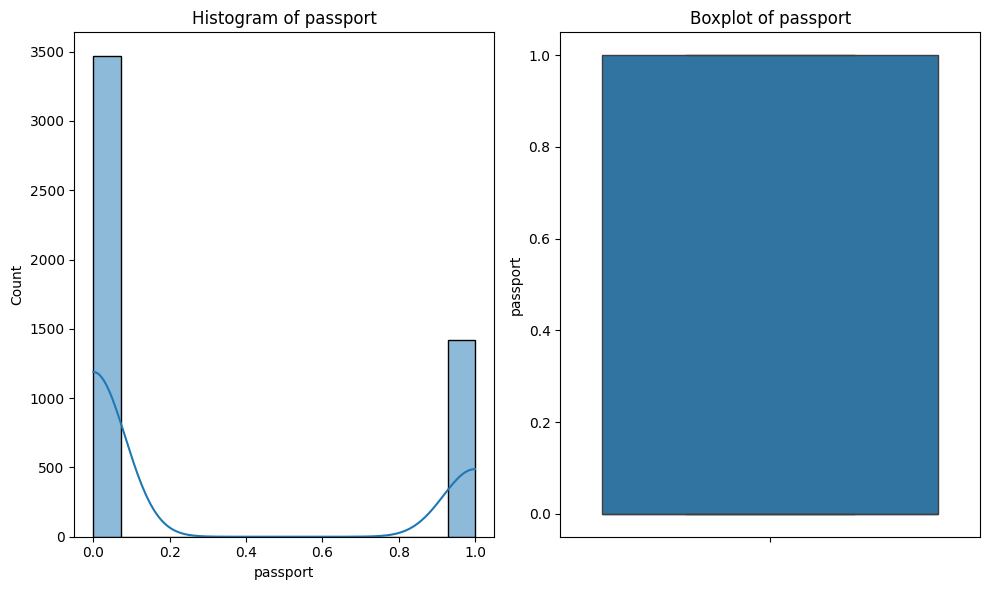

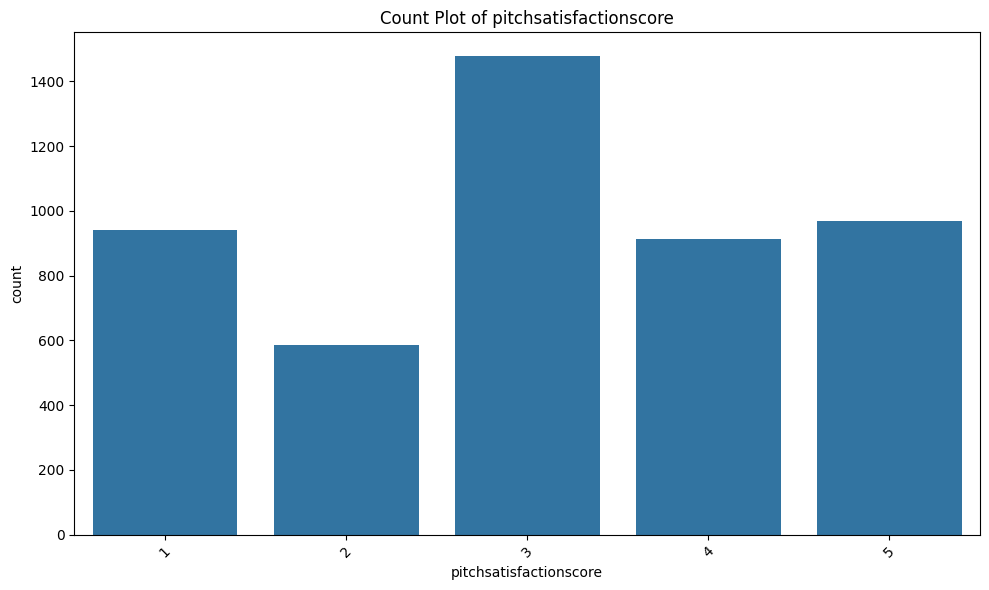

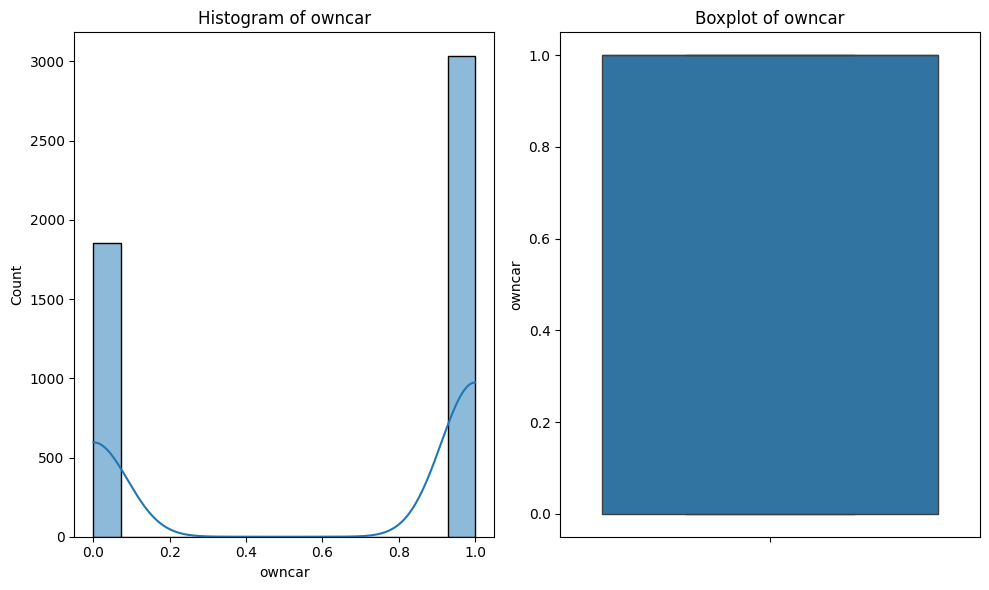

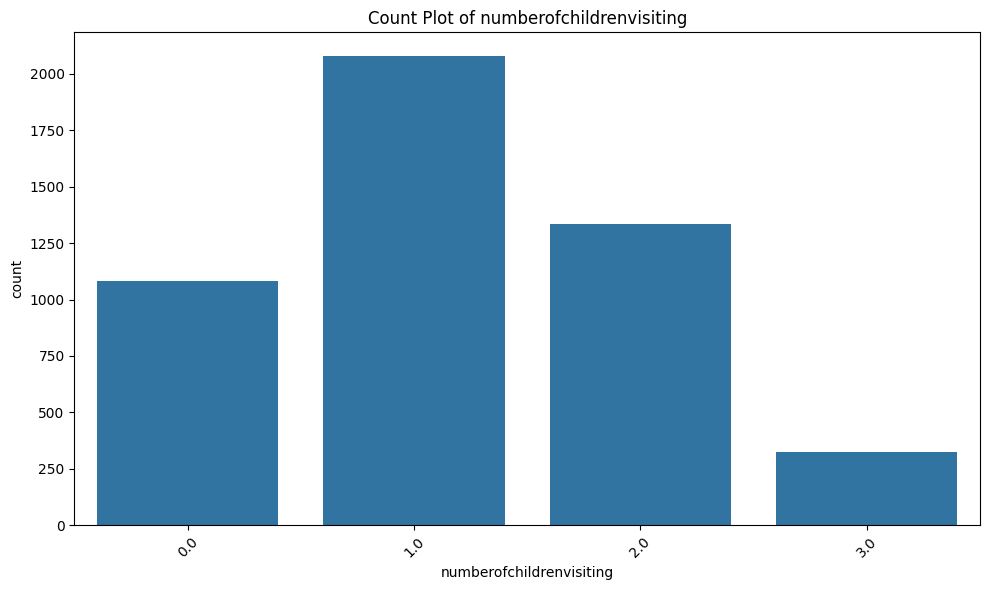

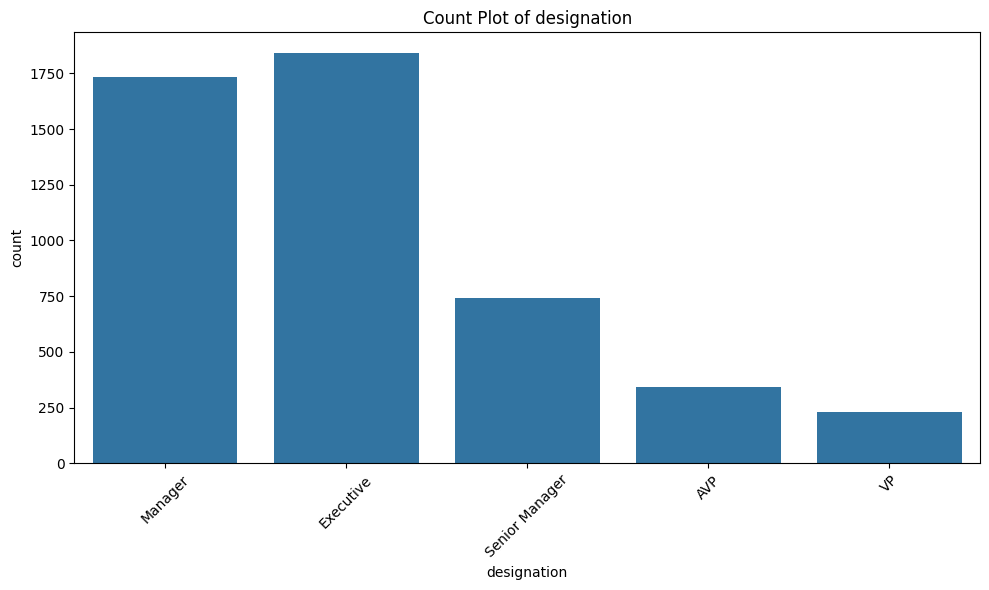

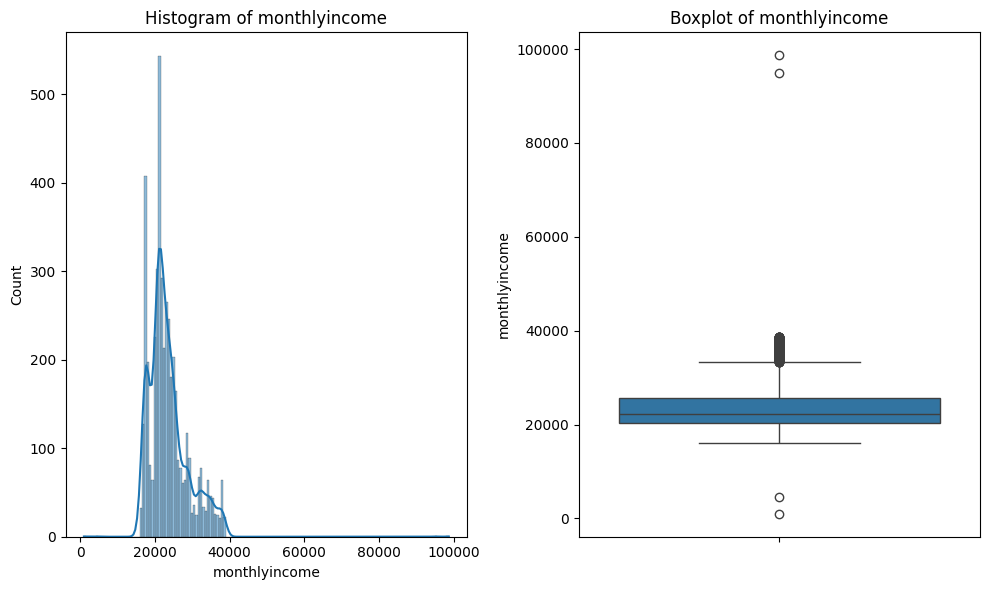

In [ ]:
# Memanggil fungsi untuk melakukan univariate analysis
univariate_analysis(df)

### Insight :

#### Kolom Numerik:
- Age: Distribusi agak skewed ke kanan. Ada beberapa nilai kosong yang perlu ditangani.
- MonthlyIncome: Ada beberapa nilai outlier yang sangat tinggi. Distribusi skewed ke kanan.
- DurationOfPitch: Beberapa nilai yang lebih tinggi dari yang lain, mungkin outlier.

#### Kolom Kategorikal:
- Gender: Distribusi cukup seimbang, tetapi ada kesalahan pengetikan seperti "Fe Male".
- TypeofContact: Ada dua kategori yang mendominasi: "Self Enquiry" dan "Company Invited".
- ProductPitched: Beberapa produk mendominasi, seperti "Basic" dan "Deluxe".
- Kolom Target (ProdTaken): Distribusi cenderung tidak seimbang. Salah satu nilai mendominasi, yang mungkin memerlukan teknik balancing saat pemodelan.

#### Follow-up Data Pre-processing
- Menangani Missing Values: Kolom seperti "Age", "MonthlyIncome" memiliki nilai kosong yang perlu diisi atau dihapus.
- Menangani Outlier: Kolom "MonthlyIncome" dan "DurationOfPitch" perlu diperiksa lebih lanjut untuk outlier.
- Memperbaiki Kesalahan Pengetikan: Seperti pada kolom "Gender".
- Balancing Data: Kolom target "ProdTaken" mungkin memerlukan teknik balancing seperti SMOTE atau under-sampling.

## Multivariate Analysis

<Axes: >

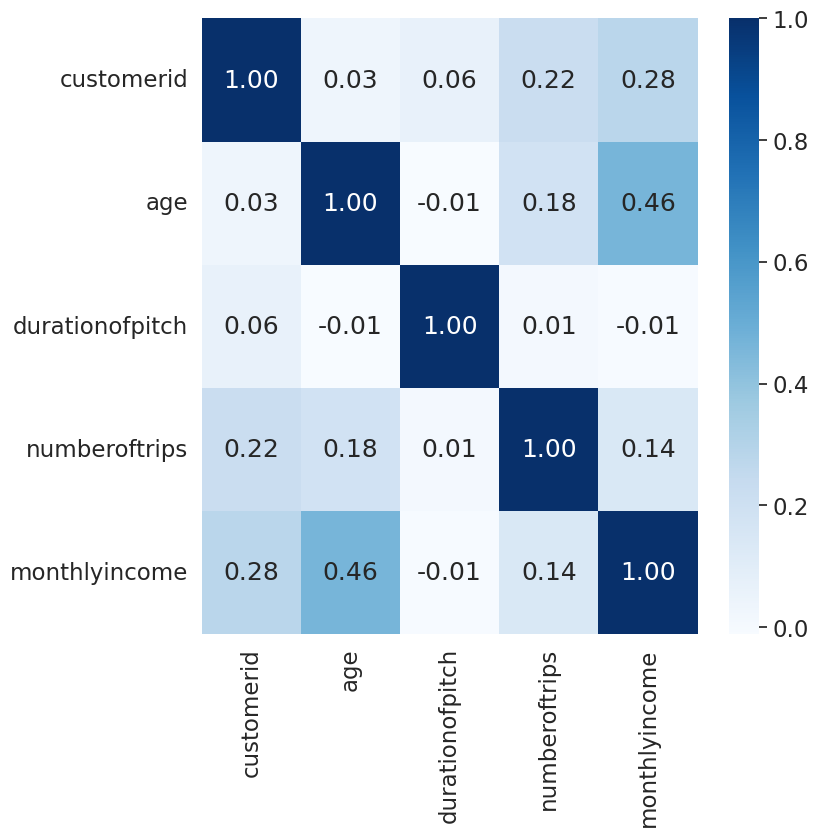

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
def segment(x):
    if x['age'] <= 21:
        segment = 'Teen'
    elif (x['age'] >= 21 and x['age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

df['segmentasi_umur'] = df.apply(lambda x: segment(x), axis=1)
df['segmentasi_umur'] = df['segmentasi_umur'].map({'Teen':0,
                                                            'Adult':1,
                                                            'Elderly':2})

df.head()

,customerid,prodtaken,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,...,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome,segmentasi_umur
0,200000,True,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,True,2,True,0.0,Manager,20993.0,1
1,200001,False,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,False,3,True,2.0,Manager,20130.0,1
2,200002,True,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,True,3,False,0.0,Executive,17090.0,1
3,200003,False,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,True,5,True,1.0,Executive,17909.0,1
4,200004,False,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,False,5,True,0.0,Executive,18468.0,2


In [ ]:
cats_new = ['typeofcontact', 'occupation','gender','productpitched', 'maritalstatus', 'designation','citytier','prodtaken','passport','owncar',\
        'numberofpersonvisiting','numberoffollowups','preferredpropertystar','pitchsatisfactionscore','numberofchildrenvisiting', 'segmentasi_umur']

In [ ]:
categorical_df = df[cats_new]
categorical_df['preferredpropertystar'] = df['preferredpropertystar']
for col in categorical_df:
    print(f'{col :-<50} {df[col].unique()}')

typeofcontact------------------------------------- ['Self Enquiry' 'Company Invited' nan]
occupation---------------------------------------- ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
gender-------------------------------------------- ['Female' 'Male' 'Fe Male']
productpitched------------------------------------ ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
maritalstatus------------------------------------- ['Single' 'Divorced' 'Married' 'Unmarried']
designation--------------------------------------- ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']
citytier------------------------------------------ [3 1 2]
prodtaken----------------------------------------- <BooleanArray>
[True, False]
Length: 2, dtype: boolean
passport------------------------------------------ <BooleanArray>
[True, False]
Length: 2, dtype: boolean
owncar-------------------------------------------- <BooleanArray>
[True, False]
Length: 2, dtype: boolean
numberofpersonvisiting-------------------

<ipython-input-20-392c4a1f91c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['preferredpropertystar'] = df['preferredpropertystar']


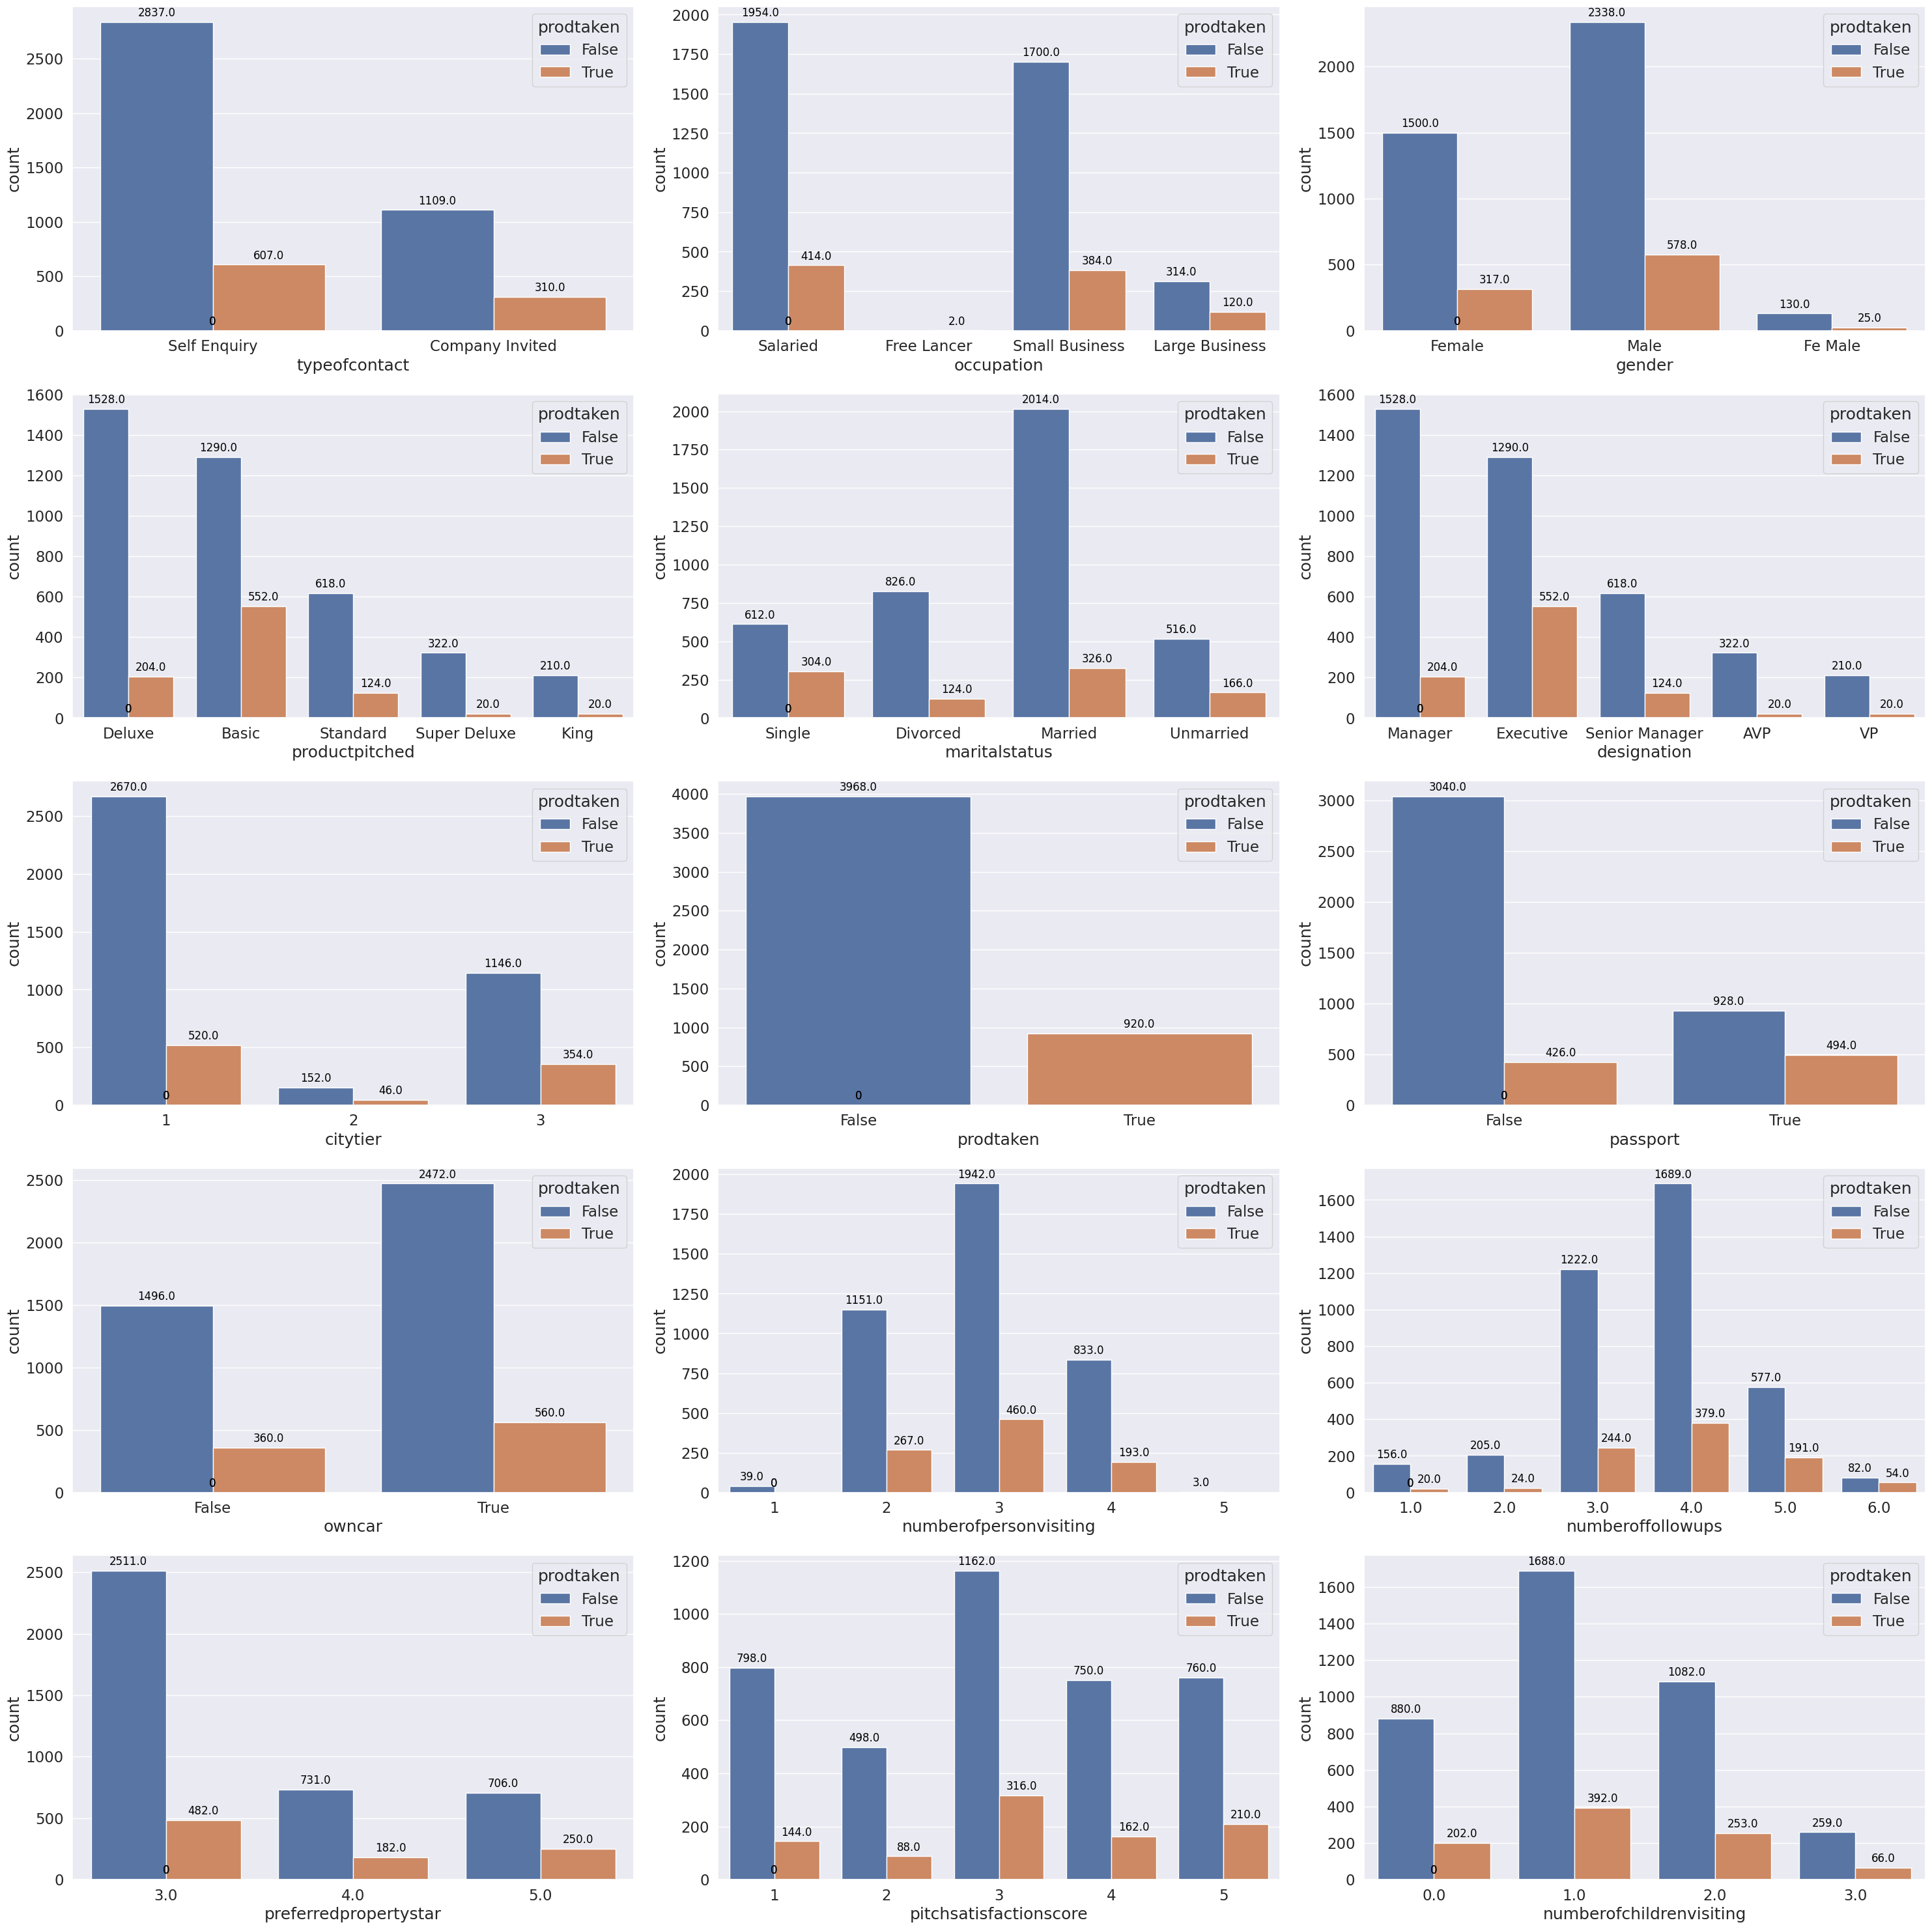

In [ ]:
# Misalkan df adalah DataFrame utama Anda
# target adalah kolom dalam df yang ingin digunakan sebagai hue

num_columns = len(categorical_df.columns)
num_rows = int(np.ceil(num_columns / 3))

fig, ax = plt.subplots(num_rows, 3, figsize=(30, 30))
sns.set(font_scale = 1.5)

# Lakukan iterasi melalui kolom kategorikal
for i, col in enumerate(categorical_df.columns):
    plot = sns.countplot(x=col, hue='prodtaken', data=df, ax=ax[i // 3][i % 3])

  # Add annotations to each bar
    for p in plot.patches:
        height = p.get_height()
        plot.annotate(f'{height}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center',
                      fontsize=12, color='black',
                      xytext=(0, 10),
                      textcoords='offset points')


# Jika jumlah subplot lebih dari yang dibutuhkan, hapus subplot kosong
for j in range(i + 1, num_rows * 3):
    fig.delaxes(ax[j // 3][j % 3])

plt.tight_layout()
plt.show()

### Insight :

#### Korelasi antara Fitur dan Label:
- MonthlyIncome dan ProdTaken: Tidak ada korelasi signifikan yang terlihat antara pendapatan bulanan dan pengambilan produk.
- NumberOfTrips dan ProdTaken: Korelasi positif kecil, menunjukkan bahwa lebih banyak perjalanan bisa sedikit meningkatkan kemungkinan pengambilan produk.
- Fitur yang lebih relevan tampaknya adalah "NumberOfTrips" dan "NumberOfFollowups" karena korelasi yang lebih tinggi dibandingkan yang lain.

#### Korelasi Antar-Fitur:
- Age dan NumberOfTrips: Korelasi kecil, bisa menunjukkan bahwa semakin tua, cenderung lebih banyak perjalanan.
- MonthlyIncome dan Occupation: Perlu investigasi lebih lanjut apakah ada hubungan antara jenis pekerjaan dan pendapatan.
- Tidak ada korelasi yang sangat kuat antara fitur-fitur lainnya.

#### Tindakan Lanjutan
- Feature Selection: Pertahankan fitur yang menunjukkan korelasi lebih tinggi dengan label, seperti "NumberOfTrips".
- Pemeriksaan Multikollinearitas: Meskipun tidak ada korelasi yang sangat kuat antar fitur, tetap pantau multikollinearitas untuk model yang lebih kompleks.
- Data Balancing: Karena distribusi "ProdTaken" tidak seimbang, pertimbangkan teknik balancing data.

## Business Insight

#### Preferred Property Star:
- Insight: Pelanggan yang lebih memilih properti dengan bintang lebih tinggi cenderung lebih sering mengambil produk.
- Rekomendasi: Fokus pada pemasaran produk yang menawarkan pengalaman mewah untuk menarik pelanggan yang memiliki preferensi ini.

#### Duration of Pitch:
- insight: Durasi pitch yang lebih lama tampaknya sedikit meningkatkan kemungkinan pelanggan mengambil produk.
- Rekomendasi: Pertimbangkan untuk memperpanjang durasi presentasi penjualan, tetapi pastikan tetap menarik dan informatif untuk memaksimalkan minat pelanggan.

#### Occupation:
- Insight: Pelanggan dengan pekerjaan tertentu, seperti "Large Business", lebih cenderung mengambil produk dibandingkan dengan kategori pekerjaan lainnya.
- Rekomendasi: Targetkan materi pemasaran dan promosi kepada kelompok pekerjaan yang lebih mungkin mengambil produk. Pertimbangkan untuk menyesuaikan penawaran berdasarkan kebutuhan spesifik mereka.

#### Segmentasi Umur:
- Insight: Pelanggan berusia diatas 21 hingga 55 (Adult) adalah customer yang memiliki possibility lebih tinggi membeli package
- Rekomendasi: Pertimbangkan untuk melakukan marketing pada umur 21 hingga 55 supaya dapat mengoptimalkan marketing

#### Pitch Satisfaction Score
- Insight: Cukup banyak customer memberi score di bawah 4. Artinya Kebanyakan Customer tidak cukup puas akan pelayanan.
- Rekomendasi: diperlukan evaluasi pada paket yang tersedia dan peningkatan mutu pelayanan pada paket baru.

#### Owncar
- Insight: Tidak terlihat perbedaan yang cukup signifikan pengaruh customer yg memiliki mobil maupun tidak. tetapi kepemilikan mobil menunjukkan status ekonomi. Orang memiliki mobil biasanya cenderung berasal dari kalangan menangah ke atas, sedangkan yang tidak punya mobil biasanya cenderung dari kalangan menangah - menengah ke bawah.
- Rekomendasi bisnis : dilakukan penyesuaian promosi package yang sesuai dengan kemampuan pelanggan untuk meningkatkan possibility rate customer membeli package.

#### Number of person visiting
- Insight: Berdasarkan data, terlihat bahwa jumlah orang melakukan perjalanan bersama (sbg group) berada di rentang 2-4 orang. Dalam fenomena ini, terlihat bahwa orang cenderung memilih liburan bersama sama dibandingkan berlibur sendiri
- Rekomendasi: Membuat sistem bundling untuk harga paket perjalan (sebagai group)